In [1]:
# pip install dictdiffer
import dictdiffer 

import pandas as pd
from matplotlib import pyplot
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set(font_scale=1.5)


import warnings
warnings.filterwarnings('ignore')


import h2o
h2o.init(min_mem_size='25G')


DATA_LOCATION  = "../../data/"
MODELS_LOCATION = "../../models/"


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,6 hours 11 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,5 months and 8 days !!!
H2O_cluster_name:,H2O_from_python_azureuser_nnvzvd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,25.21 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


## Models trained on ALL_FEATURES

In [9]:
train = h2o.import_file( DATA_LOCATION + "processed/final.train.tsv")
test = h2o.import_file( DATA_LOCATION + "processed/final.test.tsv")

# Identify predictors and response
train_predictor_cols = train.columns
train_response_col = "Resistance_Status"
train_predictor_cols.remove('SampleID')
train_predictor_cols.remove(train_response_col)
print("train frame - predictor column: ", train_predictor_cols[0], train_predictor_cols[-1])
print("train frame - response column: ", train_response_col)



# Identify predictors and response
test_predictor_cols = test.columns
test_response_col = "Resistance_Status"
test_predictor_cols.remove('SampleID')
test_predictor_cols.remove(test_response_col)
print("test frame - predictor columns: ", test_predictor_cols[0], test_predictor_cols[-1])
print("test frame - response column: ", test_response_col)



Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
train frame - predictor column:  NC000962_3.22 NC000962_3.4411327
train frame - response column:  Resistance_Status
test frame - predictor columns:  NC000962_3.22 NC000962_3.4411327
test frame - response column:  Resistance_Status


In [10]:

# For binary classification, response should be a factor
train[train_response_col] = train[train_response_col].asfactor()
test[test_response_col] = test[test_response_col].asfactor()


# Number of CV folds (to generate level-one data for stacking)
nfolds = 5

MAX_GRID_MODELS = 10


x = train_predictor_cols
y = train_response_col




In [6]:
top_nb = h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_nb/NaiveBayes_model_python_1604923471176_225")
top_glm =  h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_glm/GLM_model_python_1604923471176_393")
top_gbm = h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_gbm/GBM_model_python_1604923471176_413")
top_xgb = h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_xgb/XGBoost_model_python_1604923471176_641")
top_dl = h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_dl/DeepLearning_model_python_1604930735703_113")
top_drf = h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_drf/DRF_model_python_1604930735703_145")


top_ensemble_ALL_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_auto/stacked_ensemble_metalearner_auto")
top_ensemble_ALL_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_deeplearning/stacked_ensemble_metalearner_deeplearning")
top_ensemble_ALL_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_drf/stacked_ensemble_metalearner_drf")
top_ensemble_ALL_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_gbm/stacked_ensemble_metalearner_gbm")
top_ensemble_ALL_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_glm/stacked_ensemble_metalearner_glm")
top_ensemble_ALL_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_naivebayes/stacked_ensemble_metalearner_naivebayes")
top_ensemble_ALL_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_xgboost/stacked_ensemble_metalearner_xgboost")


top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto/stacked_ensemble_metalearner_auto")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning/stacked_ensemble_metalearner_deeplearning")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf/stacked_ensemble_metalearner_drf")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm/stacked_ensemble_metalearner_gbm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm/stacked_ensemble_metalearner_glm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes/stacked_ensemble_metalearner_naivebayes")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost/stacked_ensemble_metalearner_xgboost")


top_ensemble_ALL_MODELS_MTLNR_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_MTLNR_auto/StackedEnsemble_model_python_1604937120558_589")
top_ensemble_CHECKPOINT_MODELS_MTLNR_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_MTLNR_auto/StackedEnsemble_model_python_1604937120558_594")

In [11]:
print('AUC on test data: ', top_nb.model_performance(test).auc(), "\n\n============================")
top_nb

AUC on test data:  0.6308581696736486 

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1604923471176_225


Model Summary: 


ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.27036993349759847
RMSE: 0.5199710890978444
LogLoss: 4.3907733111276475
Mean Per-Class Error: 0.28826979905437355
AUC: 0.751100768321513
AUCPR: 0.8346945181496381
Gini: 0.5022015366430259

Confusion Matrix (Act/Pred) for max f1 @ threshold = 2.4338228925939728e-05: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 57.68 %


ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.33561203828422775
RMSE: 0.5793203244183892
LogLoss: 4.38842128604827
Mean Per-Class Error: 0.3850328529422442
AUC: 0.6308581696736486
AUCPR: 0.7700108089513915
Gini: 0.2617163393472972

Confusion Matrix (Act/Pred) for max f1 @ threshold = 9.018296132152746e-17: 

Maximum Metrics: Maximum

,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.345896,0.654104


,,0,1,Error,Rate
0,0,241.0,182.0,0.4303,(182.0/423.0)
1,1,152.0,648.0,0.19,(152.0/800.0)
2,Total,393.0,830.0,0.2731,(334.0/1223.0)


,metric,threshold,value,idx
0,max f1,2.433823e-05,0.795092,397.0
1,max f2,6.252900e-08,0.904364,399.0
2,max f0point5,9.490915e-02,0.799843,348.0
3,max accuracy,9.490915e-02,0.728536,348.0
4,max precision,9.999831e-01,0.893750,1.0
5,max recall,6.252900e-08,1.000000,399.0
6,max specificity,9.999997e-01,0.919622,0.0
7,max absolute_mcc,9.490915e-02,0.414922,348.0
8,max min_per_class_accuracy,7.526658e-01,0.699764,277.0
9,max mean_per_class_accuracy,9.490915e-02,0.711730,348.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.102208,1.000000e+00,1.467600,1.467600,0.960000,1.000000e+00,0.960000,1.000000,0.15000,0.15000,46.760000,46.760000
1,,2,0.150450,1.000000e+00,1.399195,1.445666,0.915254,1.000000e+00,0.945652,1.000000,0.06750,0.21750,39.919492,44.566576
2,,3,0.200327,9.999999e-01,1.278135,1.403954,0.836066,1.000000e+00,0.918367,1.000000,0.06375,0.28125,27.813525,40.395408
3,,4,0.300082,9.996645e-01,1.240543,1.349632,0.811475,9.999410e-01,0.882834,0.999980,0.12375,0.40500,24.054303,34.963215
4,,5,0.399836,9.916471e-01,1.190420,1.309911,0.778689,9.971887e-01,0.856851,0.999284,0.11875,0.52375,19.042008,30.991053
5,,6,0.500409,9.438170e-01,1.193171,1.286448,0.780488,9.761841e-01,0.841503,0.994641,0.12000,0.64375,19.317073,28.644812
6,,7,0.600164,2.706567e-01,0.989928,1.237163,0.647541,7.455082e-01,0.809264,0.953232,0.09875,0.74250,-1.007172,23.716281
7,,8,0.699918,1.046298e-06,0.789436,1.173351,0.516393,4.702651e-02,0.767523,0.824077,0.07875,0.82125,-21.056352,17.335134
8,,9,0.799673,2.625813e-12,0.864621,1.134839,0.565574,1.003969e-07,0.742331,0.721278,0.08625,0.90750,-13.537910,13.483896
9,,10,0.899428,6.179552e-17,0.538822,1.068735,0.352459,1.329336e-13,0.699091,0.641282,0.05375,0.96125,-46.117828,6.873523


,,0,1,Error,Rate
0,0,4.0,159.0,0.9755,(159.0/163.0)
1,1,2.0,336.0,0.0059,(2.0/338.0)
2,Total,6.0,495.0,0.3214,(161.0/501.0)


,metric,threshold,value,idx
0,max f1,9.018296e-17,0.806723,351.0
1,max f2,1.103935e-27,0.912035,356.0
2,max f0point5,5.856787e-04,0.737212,270.0
3,max accuracy,4.350758e-16,0.678643,349.0
4,max precision,9.999998e-01,0.846715,4.0
5,max recall,1.103935e-27,1.000000,356.0
6,max specificity,1.000000e+00,0.877301,0.0
7,max absolute_mcc,9.999947e-01,0.226567,30.0
8,max min_per_class_accuracy,9.972941e-01,0.588957,123.0
9,max mean_per_class_accuracy,9.999947e-01,0.614967,30.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.035928,1.000000e+00,0.823471,0.823471,0.555556,1.000000e+00,0.555556,1.000000,0.029586,0.029586,-17.652860,-17.652860
1,,2,0.041916,1.000000e+00,0.988166,0.846999,0.666667,1.000000e+00,0.571429,1.000000,0.005917,0.035503,-1.183432,-15.300085
2,,3,0.051896,1.000000e+00,1.482249,0.969162,1.000000,1.000000e+00,0.653846,1.000000,0.014793,0.050296,48.224852,-3.083751
3,,4,0.101796,1.000000e+00,1.304379,1.133484,0.880000,1.000000e+00,0.764706,1.000000,0.065089,0.115385,30.437870,13.348416
4,,5,0.151697,1.000000e+00,1.422959,1.228706,0.960000,1.000000e+00,0.828947,1.000000,0.071006,0.186391,42.295858,22.870601
5,,6,0.201597,1.000000e+00,1.126509,1.203410,0.760000,1.000000e+00,0.811881,1.000000,0.056213,0.242604,12.650888,20.340969
6,,7,0.301397,9.999991e-01,1.245089,1.217211,0.840000,9.999998e-01,0.821192,1.000000,0.124260,0.366864,24.508876,21.721071
7,,8,0.401198,9.999738e-01,0.978284,1.157776,0.660000,9.999905e-01,0.781095,0.999998,0.097633,0.464497,-2.171598,15.777621
8,,9,0.500998,9.995045e-01,0.948639,1.116115,0.640000,9.998360e-01,0.752988,0.999965,0.094675,0.559172,-5.136095,11.611542
9,,10,0.600798,9.756694e-01,0.978284,1.093220,0.660000,9.911600e-01,0.737542,0.998503,0.097633,0.656805,-2.171598,9.321984


,,0,1,Error,Rate
0,0,0.0,423.0,1.0,(423.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,0.0,1223.0,0.3459,(423.0/1223.0)


,metric,threshold,value,idx
0,max f1,3.107947e-10,0.790905,399.0
1,max f2,3.107947e-10,0.904364,399.0
2,max f0point5,6.877151e-04,0.755682,274.0
3,max accuracy,2.923637e-08,0.680294,398.0
4,max precision,1.000000e+00,0.841808,0.0
5,max recall,3.107947e-10,1.000000,399.0
6,max specificity,1.000000e+00,0.867612,0.0
7,max absolute_mcc,6.877151e-04,0.301672,274.0
8,max min_per_class_accuracy,1.544699e-03,0.652482,263.0
9,max mean_per_class_accuracy,6.877151e-04,0.657559,274.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.119379,1.000000e+00,1.413570,1.413570,0.924658,1.000000e+00,0.924658,1.000000,0.16875,0.16875,41.357021,41.357021
1,,2,0.152903,1.000000e+00,1.193171,1.365247,0.780488,1.000000e+00,0.893048,1.000000,0.04000,0.20875,19.317073,36.524733
2,,3,0.200327,1.000000e+00,1.186099,1.322837,0.775862,1.000000e+00,0.865306,1.000000,0.05625,0.26500,18.609914,32.283673
3,,4,0.300082,9.999999e-01,1.202951,1.282984,0.786885,1.000000e+00,0.839237,1.000000,0.12000,0.38500,20.295082,28.298365
4,,5,0.399836,9.993061e-01,1.090174,1.234880,0.713115,9.999141e-01,0.807771,0.999979,0.10875,0.49375,9.017418,23.487986
5,,6,0.500409,1.397471e-01,1.081311,1.204016,0.707317,8.368773e-01,0.787582,0.967198,0.10875,0.60250,8.131098,20.401552
6,,7,0.600164,1.076027e-04,1.002459,1.170514,0.655738,1.313929e-02,0.765668,0.808622,0.10000,0.70250,0.245902,17.051431
7,,8,0.699918,4.439823e-09,0.889682,1.130489,0.581967,1.451966e-05,0.739486,0.693376,0.08875,0.79125,-11.031762,13.048919
8,,9,0.799673,3.509020e-12,0.877152,1.098887,0.573770,4.980517e-10,0.718814,0.606882,0.08750,0.87875,-12.284836,9.888676
9,,10,0.899428,1.257580e-20,0.839559,1.070125,0.549180,3.575193e-13,0.700000,0.539573,0.08375,0.96250,-16.044057,7.012500


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.73104733,0.019846965,0.7148594,0.7380952,0.748954,0.7053942,0.74793386
1,auc,0.7422957,0.045274667,0.76082253,0.76421857,0.7336871,0.66809005,0.7846601
2,aucpr,0.8217056,0.034272775,0.8420239,0.8386451,0.82557905,0.7615305,0.84074944
3,err,0.26895267,0.019846965,0.28514057,0.26190478,0.25104603,0.29460582,0.2520661
4,err_count,65.8,5.263079,71.0,66.0,60.0,71.0,61.0
5,f0point5,0.7643697,0.017081713,0.7551826,0.7643979,0.7801047,0.74091333,0.78125
6,f1,0.81966215,0.007892913,0.8116711,0.8156425,0.8324022,0.81748074,0.82111436
7,f2,0.8841447,0.018203774,0.8772936,0.8742515,0.89221555,0.91169727,0.8652658
8,lift_top_group,1.4557146,0.10668536,1.3676137,1.5849056,1.5031446,1.3251196,1.4977896
9,logloss,6.9117966,3.3499985,4.768356,6.8185945,12.62863,6.051729,4.2916746


In [27]:
top_nb.save_model_details()

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/dissertationrgvm/code/Users/UPLASHA2/LJMU_Masters_Dissertation/src/notebooks/FINAL/NaiveBayes_model_python_1604923471176_225.json'

In [60]:
top_nb.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'NaiveBayes_model_python_1604923471176_225',
   'type': 'Key<Model>',
   'URL': '/3/Models/NaiveBayes_model_python_1604923471176_225'}},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 1234},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Random'},
 'fold_column': {'default': None, 'actual': None},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistanc

In [33]:
top_nb.model_performance(xval=True)


ModelMetricsBinomial: naivebayes
** Reported on cross-validation data. **

MSE: 0.35928627640629757
RMSE: 0.5994049352535376
LogLoss: 6.885446402616566
Mean Per-Class Error: 0.3424408983451537
AUC: 0.6892390661938534
AUCPR: 0.7895239621957413
Gini: 0.3784781323877069

Confusion Matrix (Act/Pred) for max f1 @ threshold = 3.1079474322197317e-10: 


,,0,1,Error,Rate
0,0,0.0,423.0,1.0,(423.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,0.0,1223.0,0.3459,(423.0/1223.0)



Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 48.53 %



,metric,threshold,value,idx
0,max f1,3.107947e-10,0.790905,399.0
1,max f2,3.107947e-10,0.904364,399.0
2,max f0point5,6.877151e-04,0.755682,274.0
3,max accuracy,2.923637e-08,0.680294,398.0
4,max precision,1.000000e+00,0.841808,0.0
5,max recall,3.107947e-10,1.000000,399.0
6,max specificity,1.000000e+00,0.867612,0.0
7,max absolute_mcc,6.877151e-04,0.301672,274.0
8,max min_per_class_accuracy,1.544699e-03,0.652482,263.0
9,max mean_per_class_accuracy,6.877151e-04,0.657559,274.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.119379,1.000000e+00,1.413570,1.413570,0.924658,1.000000e+00,0.924658,1.000000,0.16875,0.16875,41.357021,41.357021
1,,2,0.152903,1.000000e+00,1.193171,1.365247,0.780488,1.000000e+00,0.893048,1.000000,0.04000,0.20875,19.317073,36.524733
2,,3,0.200327,1.000000e+00,1.186099,1.322837,0.775862,1.000000e+00,0.865306,1.000000,0.05625,0.26500,18.609914,32.283673
3,,4,0.300082,9.999999e-01,1.202951,1.282984,0.786885,1.000000e+00,0.839237,1.000000,0.12000,0.38500,20.295082,28.298365
4,,5,0.399836,9.993061e-01,1.090174,1.234880,0.713115,9.999141e-01,0.807771,0.999979,0.10875,0.49375,9.017418,23.487986
5,,6,0.500409,1.397471e-01,1.081311,1.204016,0.707317,8.368773e-01,0.787582,0.967198,0.10875,0.60250,8.131098,20.401552
6,,7,0.600164,1.076027e-04,1.002459,1.170514,0.655738,1.313929e-02,0.765668,0.808622,0.10000,0.70250,0.245902,17.051431
7,,8,0.699918,4.439823e-09,0.889682,1.130489,0.581967,1.451966e-05,0.739486,0.693376,0.08875,0.79125,-11.031762,13.048919
8,,9,0.799673,3.509020e-12,0.877152,1.098887,0.573770,4.980517e-10,0.718814,0.606882,0.08750,0.87875,-12.284836,9.888676
9,,10,0.899428,1.257580e-20,0.839559,1.070125,0.549180,3.575193e-13,0.700000,0.539573,0.08375,0.96250,-16.044057,7.012500


In [ ]:
top_glm


In [61]:
top_glm.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_model_python_1604923471176_393',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_model_python_1604923471176_393'}},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 1234},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Random'},
 'fold_column': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistance_Status',
   

In [62]:
top_glm.actual_params

{'model_id': 'GLM_model_python_1604923471176_393',
 'training_frame': None,
 'validation_frame': None,
 'nfolds': 5,
 'seed': 1234,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'Random',
 'fold_column': None,
 'response_column': 'Resistance_Status',
 'ignored_columns': ['SampleID'],
 'random_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'offset_column': None,
 'weights_column': None,
 'family': 'binomial',
 'rand_family': None,
 'tweedie_variance_power': 6.0,
 'tweedie_link_power': 3.0,
 'theta': 0.6,
 'solver': 'IRLSM',
 'alpha': [0.6],
 'lambda': [0.028483474641804576],
 'lambda_search': False,
 'early_stopping': True,
 'nlambdas': -1,
 'standardize': True,
 'missing_values_handling': 'MeanImputation',
 'plug_values': None,
 'compute_p_values': False,
 'remove_collinear_columns': False,
 'intercept': True,
 'non_negative': False,
 'max_iterations':

In [63]:
top_glm.run_time

6256

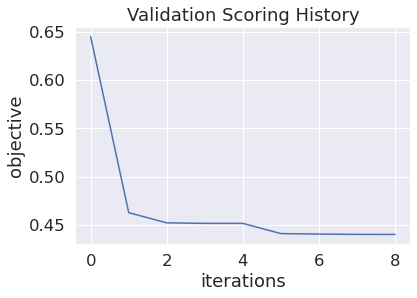

In [34]:
top_glm.plot()

In [ ]:
top_gbm


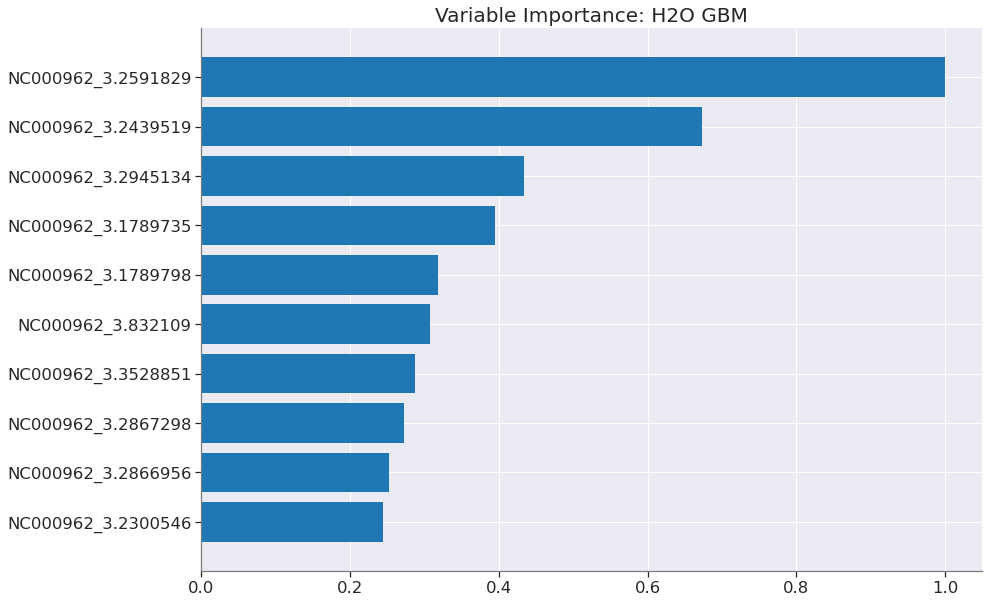

In [49]:
top_gbm.varimp_plot()

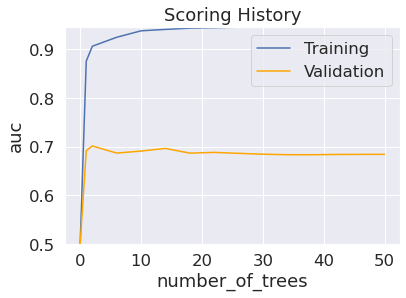

In [42]:
top_gbm.plot(metric='auc')

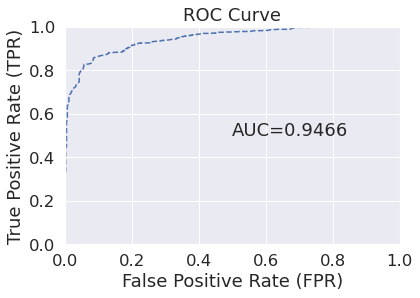

In [46]:
top_gbm.model_performance().plot()

In [ ]:
top_xgb


In [ ]:
top_dl


In [70]:
top_dl.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_model_python_1604930735703_113',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_model_python_1604930735703_113'}},
 'training_frame': {'default': None, 'actual': None},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Random'},
 'fold_column': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistance_Status',
   'is_member_of_frames': N

In [ ]:
top_drf

In [72]:
top_ensemble_ALL_MODELS_MTLNR_auto.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_model_python_1604937120558_589',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_model_python_1604937120558_589'}},
 'training_frame': {'default': None, 'actual': None},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Resistance_Status',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'blending_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,
     'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>'},
    'name': 'NaiveBayes_model_python_1604937120558_113',
    'type': 'Key<Keyed>',
    'URL': None},
   {'__meta': {'schema_version': 3,
     'schema_name': 'KeyV3'

## Models trained on PCA300 Features